# Ford GoBike System Data
## by Mostafa Mohamed Mahmoud Abdelghafaar

## Investigation Overview

> The general purpose of the report is to explain in general terms about the individual trips that are made in the bike-sharing system that covers the Greater San Francisco Bay Area and to identify the factors that drive participants to participate in trips, what distinguishes some areas from others, the percentage of participation numbers of males and females, and the time spent Some spend it and some other factors that increase our knowledge of the factors that go into trips.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization about genders of participants

> This visualization show us that most of peoples are Males and The remainder nearly represent a quarter of the percentage of participants are females and others.

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64


Text(0.5, 1.0, 'Gender proportion')

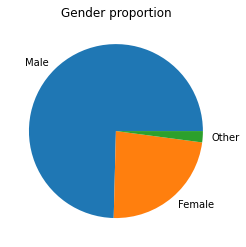

In [3]:
#visulization show us each gender proportion in particpating in races
df_gender=df['member_gender'].dropna()
df_sorted = df_gender.value_counts()
print(df_sorted)
plt.pie(df_sorted, labels=df_sorted.index);
plt.title('Gender proportion')

## Visualization about ages participated and their duration in race

> I noticed that Most ages paricipate is more than 20 and less than 40 in average duration 1000 sec .

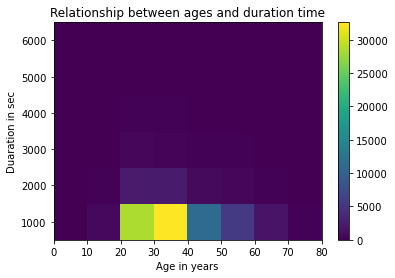

In [4]:
# visuliztion show most ages participate and their duration in race
df['age'] = 2019 - df['member_birth_year']
bins_y = np.arange(500, 7000, 1000)
bins_x = np.arange(0, 90, 10)
plt.hist2d(df['age'], df['duration_sec'], bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age in years')
plt.ylabel('Duaration in sec');
plt.title('Relationship between ages and duration time');

## Visualization between 3 variables genders and their ages and duration for each

> Here obvious that although the number of trips with higher duration is higher for males but some women around 60 years of age take a longer period of time.

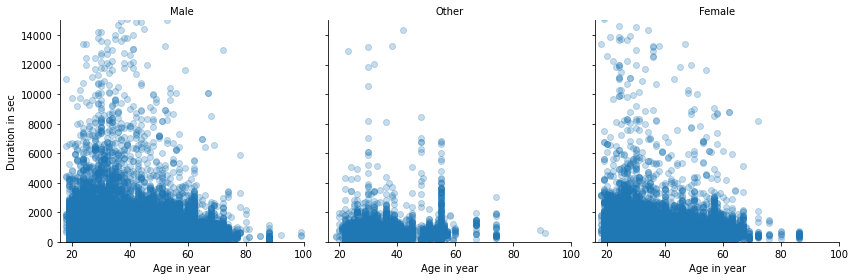

In [5]:
#FacetGrid for relation between ages and durations in top 10 stations
g = sb.FacetGrid(data = df, col='member_gender', col_wrap=3, size = 4, xlim=[16,100], ylim=[0, 15000])
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.25);
g.set_titles('{col_name}')
g.set_xlabels('Age in year')
g.set_ylabels('Duration in sec');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!